<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入原始数据" data-toc-modified-id="导入原始数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入原始数据</a></span></li><li><span><a href="#查看数据基本信息：" data-toc-modified-id="查看数据基本信息：-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>查看数据基本信息：</a></span></li><li><span><a href="#数据清洗" data-toc-modified-id="数据清洗-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据清洗</a></span><ul class="toc-item"><li><span><a href="#（1）选择子集" data-toc-modified-id="（1）选择子集-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>（1）选择子集</a></span></li><li><span><a href="#（2）列重命名" data-toc-modified-id="（2）列重命名-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>（2）列重命名</a></span></li><li><span><a href="#（3）缺失值处理" data-toc-modified-id="（3）缺失值处理-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>（3）缺失值处理</a></span></li><li><span><a href="#（4）数据类型转换" data-toc-modified-id="（4）数据类型转换-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>（4）数据类型转换</a></span></li><li><span><a href="#（5）数据排序" data-toc-modified-id="（5）数据排序-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>（5）数据排序</a></span></li><li><span><a href="#（6）异常值处理" data-toc-modified-id="（6）异常值处理-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>（6）异常值处理</a></span></li></ul></li><li><span><a href="#构建模型及数据可视化" data-toc-modified-id="构建模型及数据可视化-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>构建模型及数据可视化</a></span><ul class="toc-item"><li><span><a href="#（1）业务指标1:月均消费次数" data-toc-modified-id="（1）业务指标1:月均消费次数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>（1）业务指标1:月均消费次数</a></span></li><li><span><a href="#（2）业务指标2:月均消费金额" data-toc-modified-id="（2）业务指标2:月均消费金额-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>（2）业务指标2:月均消费金额</a></span></li><li><span><a href="#（3）客单价" data-toc-modified-id="（3）客单价-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>（3）客单价</a></span></li><li><span><a href="#（4）消费趋势" data-toc-modified-id="（4）消费趋势-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>（4）消费趋势</a></span><ul class="toc-item"><li><span><a href="#a.-导入python可视化相关的包" data-toc-modified-id="a.-导入python可视化相关的包-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>a. 导入python可视化相关的包</a></span></li><li><span><a href="#b.-分析每天的消费金额" data-toc-modified-id="b.-分析每天的消费金额-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>b. 分析每天的消费金额</a></span></li><li><span><a href="#c.-分析每月的消费金额" data-toc-modified-id="c.-分析每月的消费金额-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>c. 分析每月的消费金额</a></span></li><li><span><a href="#d.-分析药品销售情况" data-toc-modified-id="d.-分析药品销售情况-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>d. 分析药品销售情况</a></span></li><li><span><a href="#e.-每天的消费金额分布情况" data-toc-modified-id="e.-每天的消费金额分布情况-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>e. 每天的消费金额分布情况</a></span></li></ul></li></ul></li></ul></div>

数据分析的目的：
本篇文章中，假设以朝阳医院2018年销售数据为例，目的是了解朝阳医院在2018年里的销售情况，通过对朝阳区医院的药品销售数据的分析，了解朝阳医院的患者的月均消费次数，月均消费金额、客单价以及消费趋势、需求量前几位的药品等。

## 导入原始数据

In [57]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
#导入数据
file_name = '朝阳医院2018年销售数据.xlsx'
# 使用ExcelFile()时需要传入目标excel文件所在路径及文件名称
xls = pd.ExcelFile(file_name)
# 使用parse()可以根据传入的sheet名称来提取对应的表格信息
dataDF = xls.parse('Sheet1',dtype='object')
# 输出前五行数据
dataDF.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [58]:
#　使用sheet_names来查看当前表格中包含的所有sheet名称（按顺序）
print(xls.sheet_names[0])

Sheet1


## 查看数据基本信息：

In [59]:
#查看基本信息
#查看数据几行几列
print(dataDF.shape)
#查看索引
print(dataDF.index)
#查看每一列的列表头内容
print(dataDF.columns)
#查看每一列数据统计数目
print(dataDF.count())

(6578, 7)
RangeIndex(start=0, stop=6578, step=1)
Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')
购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64


## 数据清洗

数据清洗过程包括：选择子集、列名重命名、缺失数据处理、数据类型转换、数据排序及异常值处理

### （1）选择子集

在我们获取到的数据中，可能数据量非常庞大，并不是每一列都有价值都需要分析，这时候就需要从整个数据中选取合适的子集进行分析，这样能从数据中获取最大价值。在本次案例中不需要选取子集，暂时可以忽略这一步。

### （2）列重命名
在数据分析过程中，有些列名和数据容易混淆或产生歧义，不利于数据分析，这时候需要把列名换成容易理解的名称，可以采用rename函数实现：

In [60]:
#列重命名
dataDF.rename(columns={'购药时间':'销售时间'},inplace=True)
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


### （3）缺失值处理
获取的数据中很有可能存在缺失值，通过查看基本信息可以推测“购药时间”和“社保卡号”这两列存在缺失值，如果不处理这些缺失值会干扰后面的数据分析结果。

缺失数据常用的处理方式为删除含有缺失数据的记录或者利用算法去补全缺失数据。

在本次案例中为求方便，直接使用dropna函数删除缺失数据，具体如下：

In [61]:
#缺失值处理
print('删除缺失值前:', dataDF.shape)
# 使用info查看数据信息,
print(dataDF.info())
#删除缺失值
dataDF = dataDF.dropna(subset=['销售时间','社保卡号'], how='any')
print('\n删除缺失值后',dataDF.shape)
print(dataDF.info())

删除缺失值前: (6578, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
销售时间    6576 non-null object
社保卡号    6576 non-null object
商品编码    6577 non-null object
商品名称    6577 non-null object
销售数量    6577 non-null object
应收金额    6577 non-null object
实收金额    6577 non-null object
dtypes: object(7)
memory usage: 359.8+ KB
None

删除缺失值后 (6575, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6577
Data columns (total 7 columns):
销售时间    6575 non-null object
社保卡号    6575 non-null object
商品编码    6575 non-null object
商品名称    6575 non-null object
销售数量    6575 non-null object
应收金额    6575 non-null object
实收金额    6575 non-null object
dtypes: object(7)
memory usage: 410.9+ KB
None


### （4）数据类型转换
在导入数据时为了防止导入不进来，会强制所有数据都是object类型，但实际数据分析过程中“销售数量”，“应收金额”，“实收金额”，这些列需要浮点型（float）数据，“销售时间”需要改成时间格式，因此需要对数据类型进行转换。

可以使用astype()函数转为浮点型数据：

In [62]:
#数据类型转换
dataDF['销售数量'] = dataDF['销售数量'].astype('float')
dataDF['应收金额'] = dataDF['应收金额'].astype('float')
dataDF['实收金额'] = dataDF['实收金额'].astype('float')
print(dataDF.dtypes)

销售时间     object
社保卡号     object
商品编码     object
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object


**在“销售时间”这一列数据中存在星期这样的数据，但在数据分析过程中不需要用到，因此要把销售时间列中日期和星期使用split函数进行分割，分割后的时间，返回的是Series数据类型：**

In [63]:
'''
定义函数：分割销售日期，提取销售日期
输入：timeColSer 销售时间这一列，Series数据类型，例‘2018-01-01 星期五’
输出：分割后的时间，返回Series数据类型，例‘2018-01-01’
'''
def splitSaletime(timeColSer):
    timeList=[]
    
    for value in timeColSer:
        dateStr=value.split(' ')[0] #用空格进行分割
        timeList.append(dateStr)

    timeSer=pd.Series(timeList)    #将列表转行为一维数据Series类型
    return timeSer

#获取“销售时间”这一列
timeSer = dataDF.loc[:,'销售时间']

#对字符串进行分割，提取销售日期
dateSer = splitSaletime(timeSer)

#修改销售时间这一列的值
dataDF.loc[:,'销售时间'] = dateSer
dataDF.head()



,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,001616528,236701,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,0012602828,236701,感康,2.0,16.8,15.00
3,2018-01-11,0010070343428,236701,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,00101554328,236701,三九感冒灵,8.0,224.0,208.00


In [64]:
'''
数据类型转换:字符串转换为日期

把切割后的日期转为时间格式，方便后面的数据统计:
'''
#errors='coerce' 如果原始数据不符合日期的格式，转换后的值为空值NaT
dataDF.loc[:,'销售时间']=pd.to_datetime(dataDF.loc[:,'销售时间'],format='%Y-%m-%d', errors='coerce')
#dataDF.loc[:,'销售时间'] = pd.to_datetime(dataDF.loc[:,'销售时间'], format='%y-%m-%d', errors='coerce')

print(dataDF.dtypes)

销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
dtype: object


In [65]:
dataDF.isnull().sum()

销售时间    26
社保卡号     0
商品编码     0
商品名称     0
销售数量     0
应收金额     0
实收金额     0
dtype: int64

In [66]:
'''
转换日期过程中不符合日期格式的数值会被转换为空值
删除含有NaT的空行
'''
dataDF = dataDF.dropna(subset=['销售时间','社保卡号'],how='any')
datasDF = dataDF.reset_index(drop = True)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 0 to 6573
Data columns (total 7 columns):
销售时间    6549 non-null datetime64[ns]
社保卡号    6549 non-null object
商品编码    6549 non-null object
商品名称    6549 non-null object
销售数量    6549 non-null float64
应收金额    6549 non-null float64
实收金额    6549 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 409.3+ KB


In [67]:
#字符串转日期
#dataDF.loc[:,'销售时间'] = pd.to_datetime(dataDF.loc[:,'销售时间'], format='%y-%m-%d', errors='coerce')
#print(dataDF.dtypes)
#在日期转换过程中不符合日期格式的会转换为空值，这里需要删除
#dataDF = dataDF.dropna(subset=['销售时间','社保卡号'], how='any')
# dataDF.head()
dataDF.dtypes

销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
dtype: object

### （5）数据排序
此时时间是没有按顺序排列的，所以还是需要排序一下，排序之后索引会被打乱，所以也需要重置一下索引。

其中by:表示按哪一列进行排序，ascending=True表示升序排列，ascending=False表示降序排列

In [68]:
#数据排序
dataDF = dataDF.sort_values(by='销售时间', ascending=True)
dataDF = dataDF.reset_index(drop=True)
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01,0010616728,865099,硝苯地平片(心痛定),2.0,3.4,3.0
2,2018-01-01,0010073966328,861409,非洛地平缓释片(波依定),5.0,162.5,145.0
3,2018-01-01,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
4,2018-01-01,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


### （6）异常值处理
先查看数据的描述统计信息

In [69]:
#查看描述统计信息
dataDF.describe()

,销售数量,应收金额,实收金额
count,6549.000000,6549.000000,6549.000000
mean,2.384486,50.449076,46.284370
std,2.375227,87.696401,81.058426
min,-10.000000,-374.000000,-374.000000
25%,1.000000,14.000000,12.320000
50%,2.000000,28.000000,26.500000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


通过描述统计信息可以看到，“销售数量”、“应收金额”、“实收金额”这三列数据的最小值出现了负数，这明显不符合常理，数据中存在异常值的干扰，因此要对数据进一步处理，以排除异常值的影响：

In [70]:
#将'销售数量'这一列小于0的数据排除掉
pop = dataDF.loc[:,'销售数量'] > 0
dataDF = dataDF.loc[pop,:]
dataDF.describe()

,销售数量,应收金额,实收金额
count,6506.000000,6506.000000,6506.000000
mean,2.405626,50.927897,46.727653
std,2.364565,87.650282,80.997726
min,1.000000,1.200000,0.030000
25%,1.000000,14.000000,12.600000
50%,2.000000,28.000000,27.000000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


## 构建模型及数据可视化
数据清洗完成后，需要利用数据构建模型（就是计算相应的业务指标），并用可视化的方式呈现结果。

### （1）业务指标1:月均消费次数
月均消费次数 = 总消费次数 / 月份数（同一天内，同一个人所有消费算作一次消费）

In [71]:
#计算总消费次数
#删除重复数据
kpil_Df = dataDF.drop_duplicates(subset=['销售时间','社保卡号'])
totalI = kpil_Df.shape[0]
print('总消费次数=',totalI)

#计算月份数
#按销售时间升序排序
kpil_Df = kpil_Df.sort_values(by='销售时间', ascending=True)
#重命名行名
kpil_Df = kpil_Df.reset_index(drop=True)
#获取时间范围
startTime = kpil_Df.loc[0,'销售时间']
endTime = kpil_Df.loc[totalI-1,'销售时间']
#计算月份
#天数
daysI = (endTime-startTime).days
mounthI = daysI//30
print('月份数=',mounthI)

#月平均消费次数
kpil_I = totalI//mounthI
print('业务指标1：月均消费次数=', kpil_I)

总消费次数= 5342
月份数= 6
业务指标1：月均消费次数= 890


### （2）业务指标2:月均消费金额
月均消费金额 = 总消费金额 / 月份数

In [72]:
#消费总金额
totalMoneyF = dataDF.loc[:,'实收金额'].sum()
mounthMoney = totalMoneyF // mounthI
print('业务指标2：月均消费金额=', mounthMoney)

业务指标2：月均消费金额= 50668.0


### （3）客单价
客单价 = 总消费金额 / 总消费次数

In [73]:
#客单价
pct = totalMoneyF / totalI
print('业务指标3：客单价=', pct)

业务指标3：客单价= 56.909417821040805


### （4）消费趋势

#### a. 导入python可视化相关的包

#### b. 分析每天的消费金额

In [74]:
import matplotlib.pyplot as plt
import matplotlib
#画图时用于显示中文字符
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # SimHei是黑体的意思
#在操作之前先复制一份

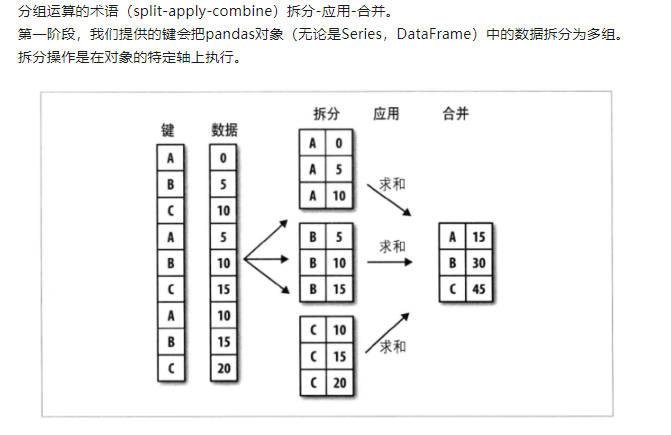

                 销售时间           社保卡号    商品编码          商品名称  销售数量   应收金额   实收金额
销售时间                                                                          
2018-01-01 2018-01-01      001616528  236701       强力VC银翘片   6.0   82.8   69.0
2018-01-01 2018-01-01     0010616728  865099    硝苯地平片(心痛定)   2.0    3.4    3.0
2018-01-01 2018-01-01  0010073966328  861409  非洛地平缓释片(波依定)   5.0  162.5  145.0
2018-01-01 2018-01-01  0010073966328  866634   硝苯地平控释片(欣然)   6.0  111.0   92.5
2018-01-01 2018-01-01  0010014289328  866851   缬沙坦分散片(易达乐)   1.0   26.0   23.0
             销售数量    应收金额     实收金额
销售时间                              
2018-01-01   62.0  1375.4  1239.10
2018-01-02   29.0   610.2   561.34
2018-01-03   43.0  1056.2   962.50
2018-01-04   39.0   818.7   766.00
2018-01-05  230.0  4658.5  4181.02
2018-01-06   40.0   890.4   846.90
2018-01-07   57.0  1161.5  1085.00
2018-01-08   49.0  1205.5  1132.40
2018-01-09   36.0   711.2   646.90
2018-01-10   56.0  1261.1  1147.50
2018-01-11   80.0  1481.0  

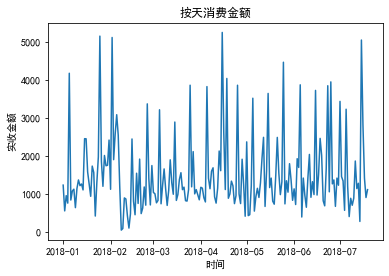

In [75]:
#mpl.rcParams['font.sans-serif'] = ['Songti'] # SimHei是黑体的意思
#font = FontProperties(fname='/Library/Fonts/Songti.ttc') #设置字体
#在操作之前先复制一份数据，防止影响清洗后的数据
groupDF = dataDF

#将'销售时间'设置为index
groupDF.index = groupDF['销售时间']
print(groupDF.head())
gb = groupDF.groupby(groupDF.index)
print(gb)
dayDF = gb.sum()
print(dayDF)
#画图
plt.plot(dayDF['实收金额'])
plt.title('按天消费金额')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.show()

从结果可以看出，每天消费总额差异较大，除了个别天出现比较大笔的消费，大部分人消费情况维持在1000-2000元以内。

#### c. 分析每月的消费金额

接下来，我销售时间先聚合再按月分组进行分析：

        销售数量     应收金额      实收金额
销售时间                           
1     2527.0  53561.6  49461.19
2     1858.0  42028.8  38790.38
3     2225.0  45318.0  41597.51
4     3005.0  54296.3  48787.84
5     2225.0  51263.4  46925.27
6     2328.0  52300.8  48327.70
7     1483.0  32568.0  30120.22


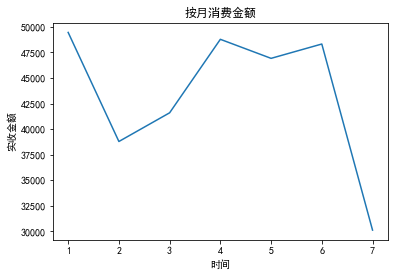

In [76]:
#将销售时间聚合按月分组
gb = groupDF.groupby(groupDF.index.month)
print(gb)
monthDF = gb.sum()
print(monthDF)

plt.plot(monthDF['实收金额'])
plt.title('按月消费金额')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.show()

结果显示，7月消费金额最少，这是因为7月份的数据不完整，所以不具参考价值。

1月、4月、5月和6月的月消费金额差异不大.

2月和3月的消费金额迅速降低，这可能是2月和3月处于春节期间，大部分人都回家过年的原因。

#### d. 分析药品销售情况

对“商品名称”和“销售数量”这两列数据进行聚合为Series形式，方便后面统计，并按降序排序：

In [77]:
#聚合统计各种药品数量
medicine = groupDF[['商品名称','销售数量']]
bk = medicine.groupby('商品名称')[['销售数量']]
re_medicine = bk.sum()

#对销售药品数量按将序排序
re_medicine = re_medicine.sort_values(by='销售数量', ascending=False)
re_medicine.head()

,销售数量
商品名称,
苯磺酸氨氯地平片(安内真),1781.0
开博通,1440.0
酒石酸美托洛尔片(倍他乐克),1140.0
硝苯地平片(心痛定),825.0
苯磺酸氨氯地平片(络活喜),796.0


**截取销售数量最多的前十种药品，并用条形图展示结果：**

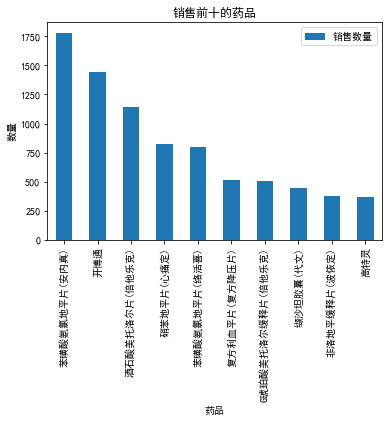

In [78]:
top_medicine = re_medicine.iloc[:10,:]
top_medicine

# 数据可视化，用条形图展示前十的药品
top_medicine.plot(kind = 'bar')
plt.title('销售前十的药品')
plt.xlabel('药品')
plt.ylabel('数量')
plt.show()

结论：对于销售量排在前几位的药品，医院应该时刻关注，保证药品不会短缺而影响患者。得到销售数量最多的前十种药品的信息，这些信息也会有助于加强医院对药房的管理。

#### e. 每天的消费金额分布情况
每天的消费金额分布情况：一横轴为时间，纵轴为实收金额画散点图。

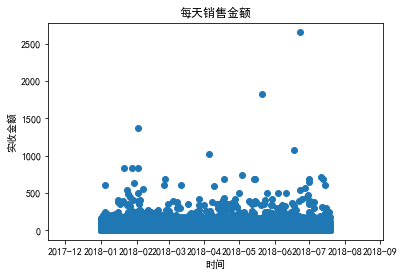

In [79]:
# 每天消售金额 -- 散点图
plt.scatter(dataDF['销售时间'],dataDF['实收金额'])
plt.title('每天销售金额')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.show()

结论：从散点图可以看出，每天消费金额在500以下的占绝大多数，个别天存在消费金额很大的情况。